<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Photometric redshifts with Dense Network
    
<font size="2">
    
This notebook was adapted from the one developed by Gabriel Teixeira for the Big Data and Astroinformatics class - prof. Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>
    
**Contact:** debom@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [1]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [2]:
dados_dir = './'
data_file = os.path.join(dados_dir, 'specz_catalog_XIIIecbpf.fits')
data, cols = open_fits_catalog(data_file)



In [3]:
df=data.to_pandas()
df

,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
0,146.622820,-0.951385,GALAXY,0.371128,0.000069,22.40671,0.9912677,20.32166,0.09126051,18.62304,0.03089815,18.05202,0.03665525
1,146.592720,-0.760256,GALAXY,0.064959,0.000009,19.03327,0.089179,17.4961,0.01081754,16.91567,0.01007535,16.50206,0.01019981
2,146.910800,-0.074559,GALAXY,0.242272,0.000086,20.18482,0.2964447,19.53431,0.08892172,18.03267,0.03387981,17.43746,0.04512536
3,146.448310,-0.713400,GALAXY,0.114698,0.000008,18.94475,0.04721325,17.98683,0.009779428,17.451,0.009233744,17.02182,0.008778921
4,146.788470,-0.310658,GALAXY,0.056562,0.000015,20.73877,0.4804843,18.73327,0.03666106,18.14503,0.03382286,17.86618,0.03925543
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175916,16.005106,-0.855950,GALAXY,0.065073,0.000007,18.20492,0.05129132,17.21942,0.01060271,16.86439,0.008551153,16.60081,0.01340905
175917,15.651509,-0.637366,GALAXY,0.191312,0.000035,20.34421,0.2486131,18.83951,0.03180256,17.65709,0.01682307,17.13594,0.01566291
175918,15.866415,-1.159094,GALAXY,0.137276,0.000023,19.12054,0.08667219,17.90217,0.01617296,17.00707,0.009945687,16.62113,0.01116389
175919,15.624099,-0.813441,GALAXY,0.237502,0.000043,20.28428,0.2404259,18.76537,0.03047216,17.38507,0.02042167,16.88052,0.01921708


In [4]:
colunas_numericas = list(df.columns[:2])+list(df.columns[3:])
colunas_numericas

['ra',
 'dec',
 'z',
 'zErr',
 'petroMag_u',
 'petroMagErr_u',
 'petroMag_g',
 'petroMagErr_g',
 'petroMag_r',
 'petroMagErr_r',
 'petroMag_i',
 'petroMagErr_i']

In [5]:
for coluna in colunas_numericas:
    df[coluna]=pd.to_numeric(df[coluna],errors='coerce')
df

,ra,dec,class,z,zErr,petroMag_u,petroMagErr_u,petroMag_g,petroMagErr_g,petroMag_r,petroMagErr_r,petroMag_i,petroMagErr_i
0,146.622820,-0.951385,GALAXY,0.371128,0.000069,22.40671,0.991268,20.32166,0.091261,18.62304,0.030898,18.05202,0.036655
1,146.592720,-0.760256,GALAXY,0.064959,0.000009,19.03327,0.089179,17.49610,0.010818,16.91567,0.010075,16.50206,0.010200
2,146.910800,-0.074559,GALAXY,0.242272,0.000086,20.18482,0.296445,19.53431,0.088922,18.03267,0.033880,17.43746,0.045125
3,146.448310,-0.713400,GALAXY,0.114698,0.000008,18.94475,0.047213,17.98683,0.009779,17.45100,0.009234,17.02182,0.008779
4,146.788470,-0.310658,GALAXY,0.056562,0.000015,20.73877,0.480484,18.73327,0.036661,18.14503,0.033823,17.86618,0.039255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175916,16.005106,-0.855950,GALAXY,0.065073,0.000007,18.20492,0.051291,17.21942,0.010603,16.86439,0.008551,16.60081,0.013409
175917,15.651509,-0.637366,GALAXY,0.191312,0.000035,20.34421,0.248613,18.83951,0.031803,17.65709,0.016823,17.13594,0.015663
175918,15.866415,-1.159094,GALAXY,0.137276,0.000023,19.12054,0.086672,17.90217,0.016173,17.00707,0.009946,16.62113,0.011164
175919,15.624099,-0.813441,GALAXY,0.237502,0.000043,20.28428,0.240426,18.76537,0.030472,17.38507,0.020422,16.88052,0.019217


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175921 entries, 0 to 175920
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             175921 non-null  float64
 1   dec            175921 non-null  float64
 2   class          175921 non-null  object 
 3   z              175921 non-null  float64
 4   zErr           175921 non-null  float64
 5   petroMag_u     174609 non-null  float64
 6   petroMagErr_u  174609 non-null  float64
 7   petroMag_g     174609 non-null  float64
 8   petroMagErr_g  174609 non-null  float64
 9   petroMag_r     174609 non-null  float64
 10  petroMagErr_r  174609 non-null  float64
 11  petroMag_i     174609 non-null  float64
 12  petroMagErr_i  174609 non-null  float64
dtypes: float64(12), object(1)
memory usage: 17.4+ MB


In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174609 entries, 0 to 175920
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             174609 non-null  float64
 1   dec            174609 non-null  float64
 2   class          174609 non-null  object 
 3   z              174609 non-null  float64
 4   zErr           174609 non-null  float64
 5   petroMag_u     174609 non-null  float64
 6   petroMagErr_u  174609 non-null  float64
 7   petroMag_g     174609 non-null  float64
 8   petroMagErr_g  174609 non-null  float64
 9   petroMag_r     174609 non-null  float64
 10  petroMagErr_r  174609 non-null  float64
 11  petroMag_i     174609 non-null  float64
 12  petroMagErr_i  174609 non-null  float64
dtypes: float64(12), object(1)
memory usage: 18.7+ MB


In [8]:
(df[colunas_numericas]==-9999.0).sum()

ra                0
dec               0
z                 0
zErr              0
petroMag_u       13
petroMagErr_u    13
petroMag_g       11
petroMagErr_g    11
petroMag_r       11
petroMagErr_r    11
petroMag_i       12
petroMagErr_i    12
dtype: int64

In [9]:
for coluna in colunas_numericas:
    df=df[df[coluna]!=-9999.0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174596 entries, 0 to 175920
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             174596 non-null  float64
 1   dec            174596 non-null  float64
 2   class          174596 non-null  object 
 3   z              174596 non-null  float64
 4   zErr           174596 non-null  float64
 5   petroMag_u     174596 non-null  float64
 6   petroMagErr_u  174596 non-null  float64
 7   petroMag_g     174596 non-null  float64
 8   petroMagErr_g  174596 non-null  float64
 9   petroMag_r     174596 non-null  float64
 10  petroMagErr_r  174596 non-null  float64
 11  petroMag_i     174596 non-null  float64
 12  petroMagErr_i  174596 non-null  float64
dtypes: float64(12), object(1)
memory usage: 18.6+ MB


key= petroMag_u
min= 10.98646
max= 35.53114
key= petroMag_g
min= 10.43868
max= 33.91218
key= petroMag_r
min= 9.994142
max= 30.69354
key= petroMag_i
min= 10.02062
max= 34.07032


<function matplotlib.pyplot.show(close=None, block=None)>

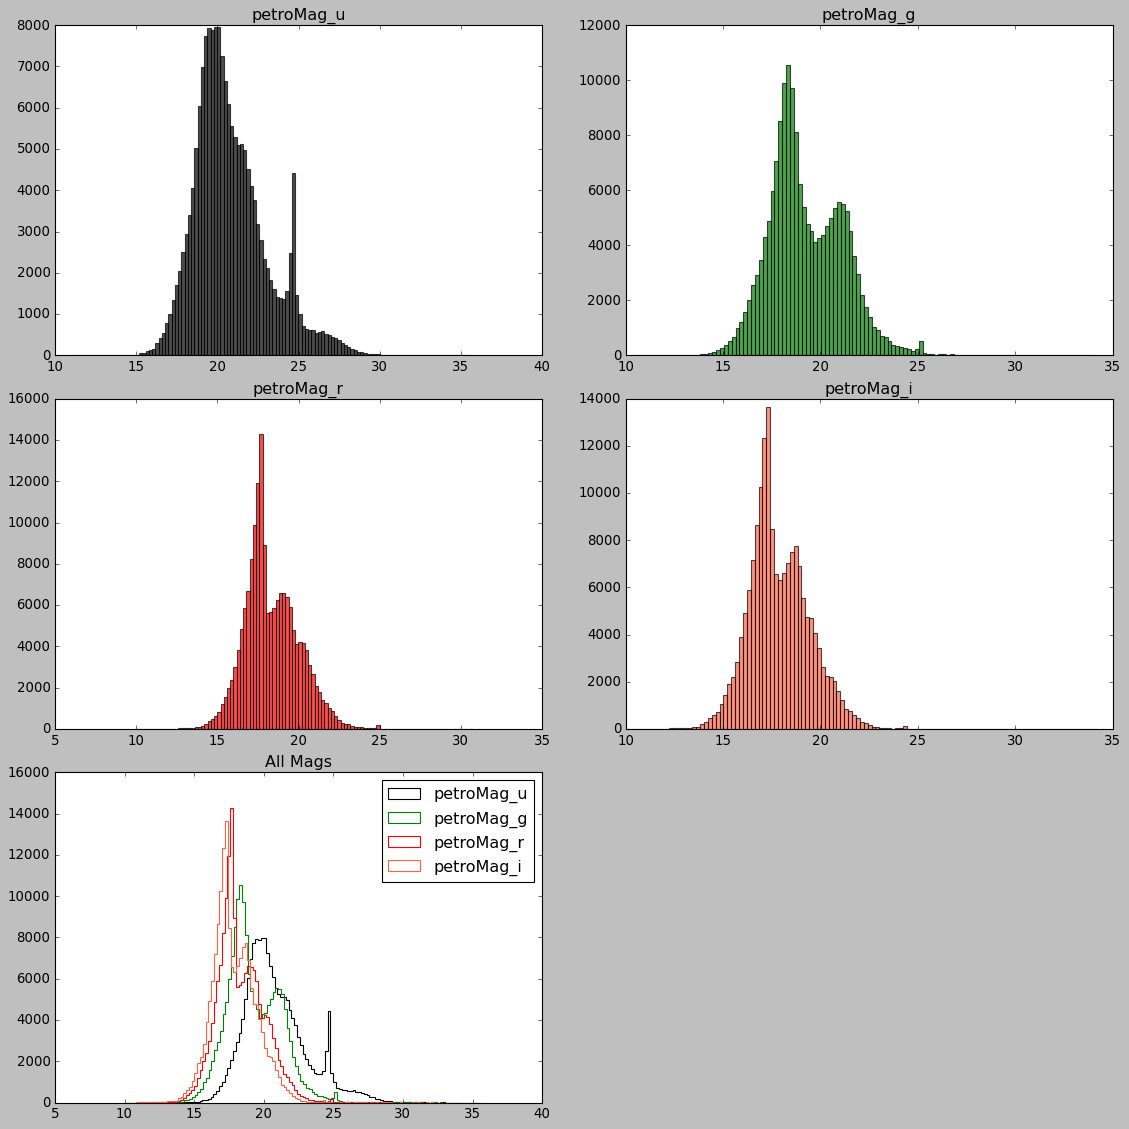

In [10]:
### MAG PLOTS

#mags = ['petroMag_'+band for band in 'ugriz']
mags = ['petroMag_'+band for band in 'ugri'] #não existe petroMag_z

key_list = mags 
color_list = ['black', 'green', 'red', 'tomato', 'palevioletred']
hor = 2
ver = 3

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
binsize=0.2
def binarange(arr):
    minimo = min(arr)
    print('min=',minimo)
    maximo = max(arr)
    print('max=',maximo)
    return np.arange(minimo, maximo+binsize, binsize)

bins=[0]*len(key_list)

for v in range(ver):
    for h in range(hor):
        if v==2:
            ax = fig.add_subplot(gs[v, 0])
            for c, key in enumerate(key_list):
                #bins = binarange(df(key))
                ax.hist(df[key], bins=bins[c], color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
       
        print('key=',key_list[i])
        ax = fig.add_subplot(gs[v, h])
        bins[i] = binarange(df[key_list[i]])
        ax.hist(df[key_list[i]], bins=bins[i], color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

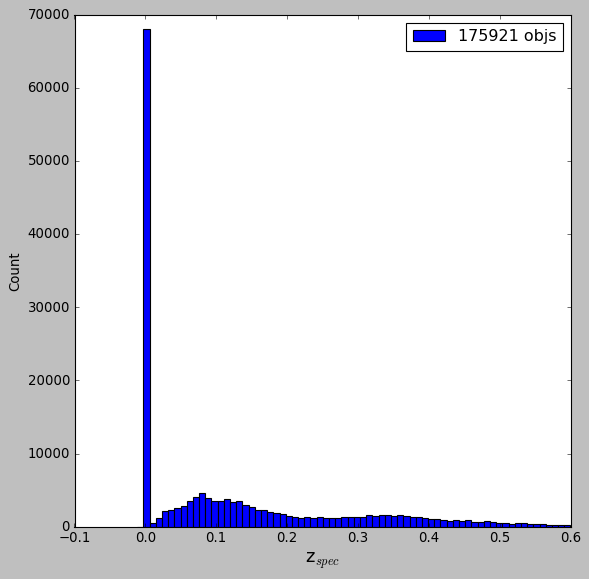

In [11]:
#ZSPEC PLOTS

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(df['z']), bins=70, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()

In [12]:
data=Table.from_pandas(df)

In [13]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

train_percentual = 7/10
train_cut = np.random.uniform(0, 1, len(data)) < train_percentual
train_data = data[train_cut]

test_val_data = data[~train_cut]

test_percentual = 2/3
test_cut = np.random.uniform(0, 1, len(test_val_data)) < test_percentual

test_data = test_val_data[test_cut]
val_data = test_val_data[~test_cut]

print(f'Train Percent = {len(train_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Val Percent = {len(val_data)/len(data)*100:.2f}%')

#embaralhando os dados

train_shuffler = np.random.choice(len(train_data), len(train_data), replace=False)
train_data = train_data[train_shuffler]

test_shuffler = np.random.choice(len(test_data), len(test_data), replace=False)
test_data = test_data[test_shuffler]

val_shuffler = np.random.choice(len(val_data), len(val_data), replace=False)
val_data = val_data[val_shuffler]


x_train = np.array([train_data.field(mag) for mag in mags]).T
y_train = np.array(train_data.field('z'))

x_test = np.array([test_data.field(mag) for mag in mags]).T
y_test = np.array(test_data.field('z'))

x_val = np.array([val_data.field(mag) for mag in mags]).T
y_val = np.array(val_data.field('z'))

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# np.max(x_test[:, 1])

Train Percent = 69.96%
Test Percent = 20.00%
Val Percent = 10.04%


In [27]:
import tensorflow.keras as keras
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"


def build_model(input_shape, nb_classes=1):
    input_layer = keras.layers.Input(input_shape)

    layer_1 = keras.layers.Dense(512, activation='relu')(input_layer)
    layer_1= keras.layers.Dropout(rate=0.2)(layer_1)

    layer_2 = keras.layers.Dense(256, activation='relu')(layer_1)
    layer_2 = keras.layers.Dropout(rate=0.2)(layer_2)

    layer_3 = keras.layers.Dense(128, activation='relu')(layer_2)
    layer_3 = keras.layers.Dropout(rate=0.2)(layer_3)

    output_layer = keras.layers.Dense(units=nb_classes,activation='linear')(layer_2)


    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    return model

regressor = build_model(x_train.shape[1:])
regressor.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 128
epochs = 2

history = regressor.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val,y_val))

preds = regressor.predict(x_test)

2021-11-18 08:40:47.088334: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-18 08:40:47.092061: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
954/955 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.0000e+00WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x13f4b29d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
955/955 [==============================] - 9s 10ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 2/2
955/955 [==============================] - 22s 23ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


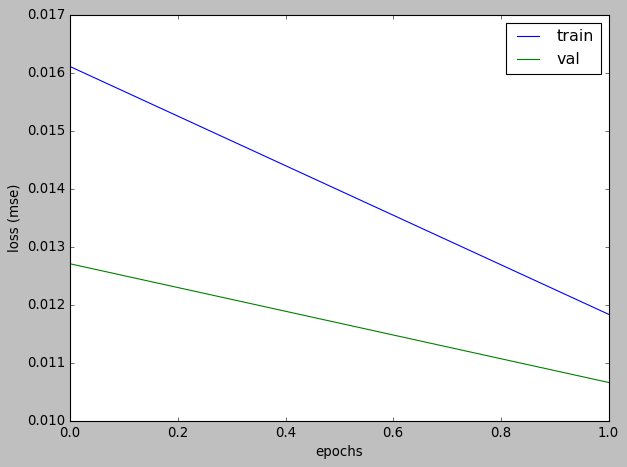

In [28]:
# TRAINING PLOTS

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('loss (mse)')
plt.legend()
plt.tight_layout()

In [30]:
### CALCULO DAS MÉTRICAS E PLOTS
def get_zstatistic(z,zspec):
    
    deltaz=z-zspec
    mean_bias=np.mean(deltaz)


    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    median_bias=np.percentile(deltaz,50)
    return mean_bias,median_bias,sigma68
    

def redshift_plot(z, zspec):
    
    plt.style.use('default')
    
    fig = plt.figure(figsize=(10, 8))
    
    mean_bias,median_bias,sigma68=get_zstatistic(z, zspec)


    text="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    ax = fig.add_subplot()
    
    #dispersão entre photo-z e spec-z
    ax.scatter(np.array(zspec), np.array(z),
                       alpha = 0.5,
                       s=8,marker='o')
    
    #reta x = y
    reta = [0, max([max(zspec), max(z)])]
    ax.plot(reta, reta,
              ls='dashed', color='black', lw=0.5)
    
    #limites e legendas
    ax.set_ylim(min(z),max(z))
    ax.set_xlim(0,max(zspec))
    ax.set_ylabel("$z_{phot}$", fontsize=15)
    ax.set_xlabel("$z_{spec}$", fontsize=15)
    ax.text(0.7*max(zspec), .2*max(z), text, va="top", fontsize=12)
    
    plt.show()


In [31]:
redshift_plot(preds, y_test)
